Major Project (80 Marks)
PROBLEM STATEMENT
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.
The goal of the case is as follows:
Perform EDA (40 Marks)
Build various Models to Predict the price (Build at least 2 models and compare the results and suggest which model works better) (30 Marks)
Insights/Suggestions (10 marks)

In addition, a brief about Feature Engineering!!


In [1]:
#importing required libraries
import os  # for input output
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter
    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


### Getting to know the Dataset

In [2]:
df = pd.read_csv("Cars.csv")

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [4]:
df.describe()

,Year,Kilometers_Driven,Seats,No. of Doors,Price
count,5959.000000,5.953000e+03,5956.000000,5960.000000,5961.000000
mean,2013.389159,5.871110e+04,5.269140,4.114933,9.528103
std,3.243051,9.171221e+04,0.789048,0.344757,11.214382
min,1998.000000,1.710000e+02,2.000000,2.000000,0.440000
25%,2011.500000,3.393100e+04,5.000000,4.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,4.000000,5.660000
75%,2016.000000,7.300000e+04,5.000000,4.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,5.000000,160.000000


In [5]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour',
       'Seats', 'No. of Doors', 'New_Price', 'Price'],
      dtype='object')

In [6]:
df.shape

(5961, 15)

In [7]:
df.ndim

2

In [8]:
df['New_Price'].value_counts()

4.78 Lakh     6
95.13 Lakh    6
63.71 Lakh    6
11.26 Lakh    5
47.87 Lakh    5
             ..
8.69 Lakh     1
10.25 Lakh    1
1 Cr          1
8.93 Lakh     1
10.1 Lakh     1
Name: New_Price, Length: 540, dtype: int64

In [9]:
#Exploring max,min,sum and mean function
df['Price'].max()

160.0

In [10]:
df['Price'].min()

0.44

In [11]:
df['Price'].sum()

56797.02

In [12]:
df['Price'].mean()

9.528102667337695

In [13]:
df.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

In [14]:
df.count()

Name                 5961
Location             5950
Year                 5959
Kilometers_Driven    5953
Fuel_Type            5961
Transmission         5934
Owner_Type           5946
Mileage              5959
Engine               5944
Power                5929
Colour               5950
Seats                5956
No. of Doors         5960
New_Price             824
Price                5961
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


In [16]:
df['Fuel_Type'].value_counts()

Diesel      3188
Petrol      2705
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [17]:
df['Transmission'].value_counts()

Manual       4225
Automatic    1709
Name: Transmission, dtype: int64

In [18]:
df['Owner_Type'].value_counts()

First             4875
Second             953
Third              110
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [19]:
df['Colour'].value_counts()

White           2115
Others          1987
Black/Silver    1848
Name: Colour, dtype: int64

In [20]:
df['Location'].value_counts()

Mumbai        781
Hyderabad     739
Kochi         646
Coimbatore    630
Pune          611
Delhi         549
Kolkata       526
Chennai       489
Jaipur        406
Bangalore     351
Ahmedabad     222
Name: Location, dtype: int64

In [21]:
df['Name'].value_counts()

Maruti Swift              343
Honda City                265
Hyundai i20               247
Hyundai Verna             170
Toyota Innova             164
                         ... 
Mahindra XUV300             1
Maruti 1000                 1
Mercedes-Benz SL-Class      1
Isuzu MUX                   1
Mahindra E                  1
Name: Name, Length: 212, dtype: int64

In [22]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [23]:
df['Price'].isnull().sum()

0

In [24]:
df['New_Price'].isnull().sum()

5137

In [25]:
df.drop('New_Price', axis=1, inplace=True)
#dropping the new_price because of 5137 null values

In [26]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40


### Exploratory Data Analysis and Visualisation

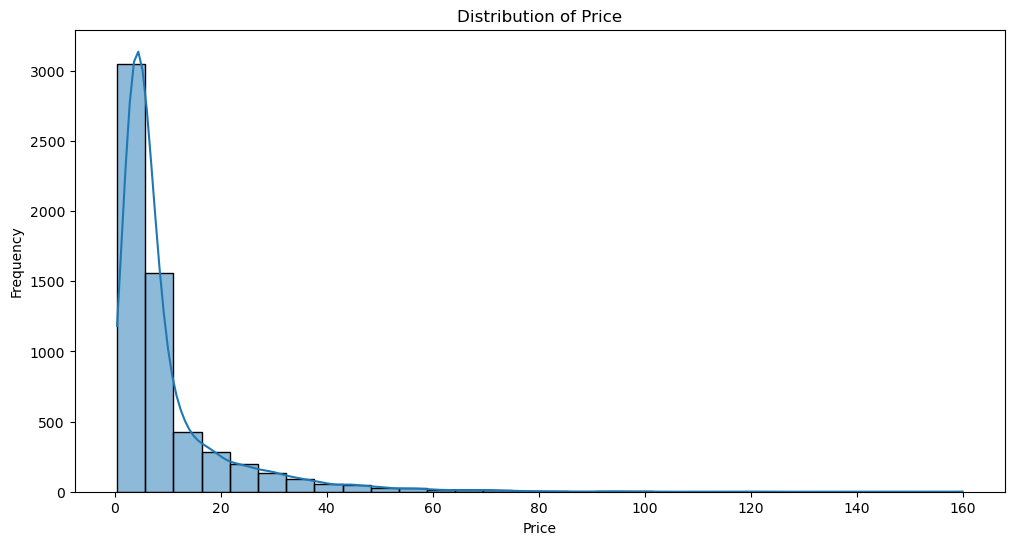

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# distribution of the target variable 'Price'

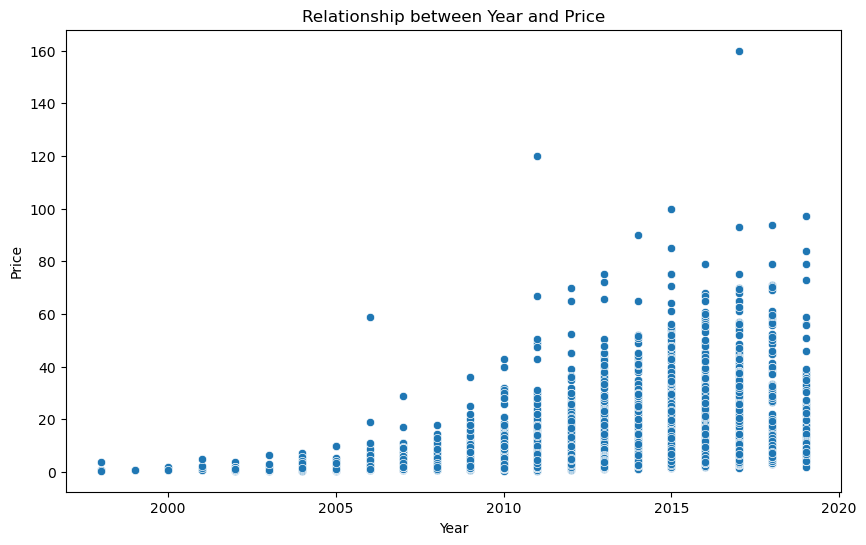

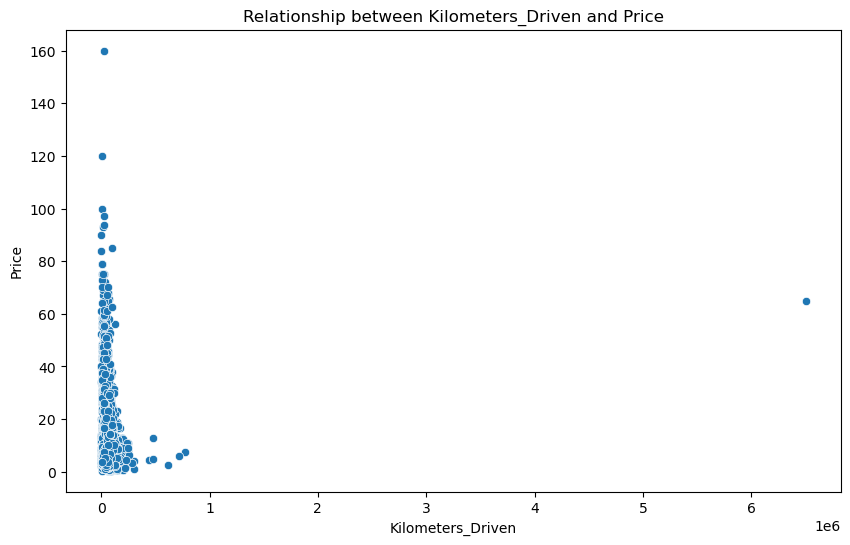

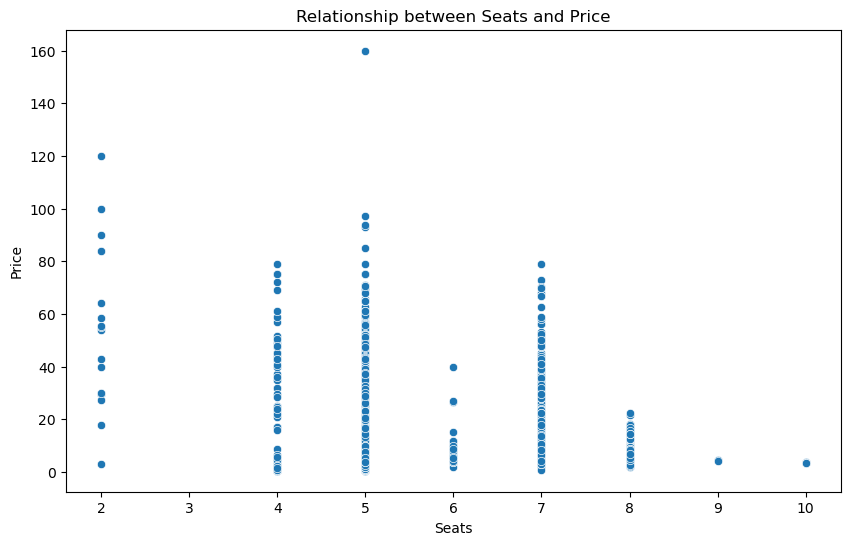

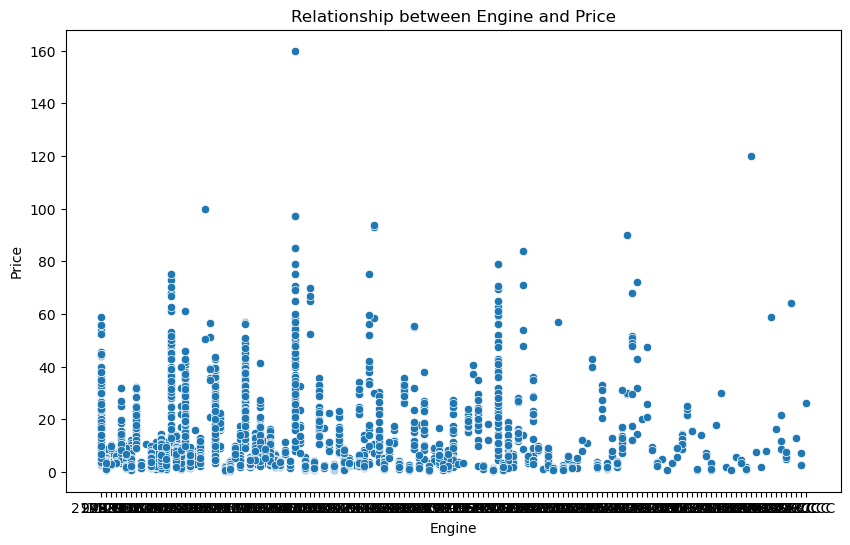

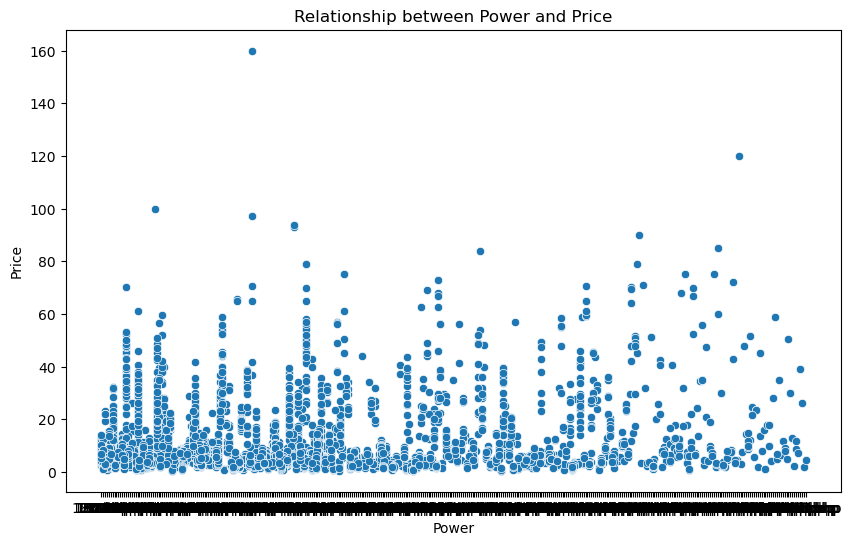

In [28]:
# relationships with numerical features
numeric_features = ['Year', 'Kilometers_Driven', 'Seats','Engine','Power']  # Add more if needed
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Price', data=df)
    plt.title(f'Relationship between {feature} and Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

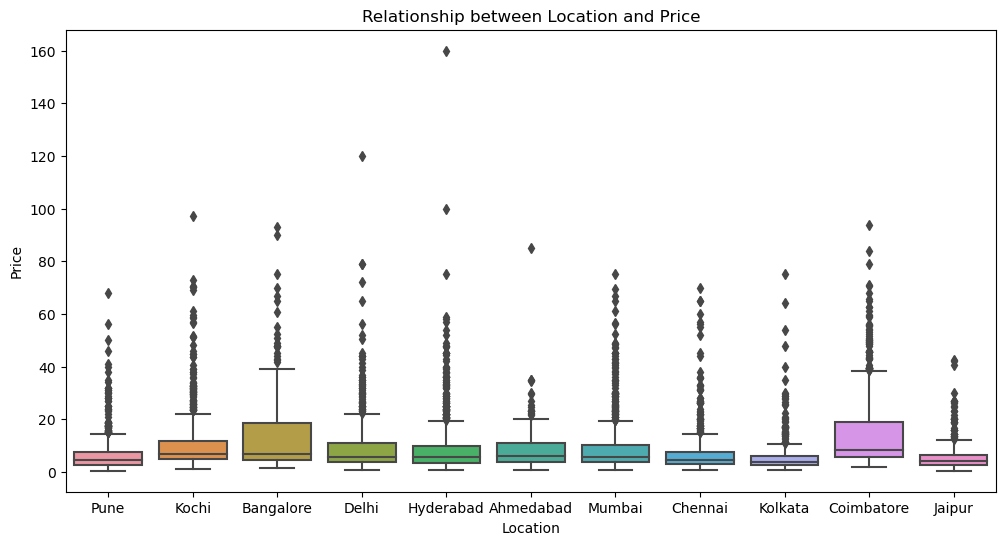

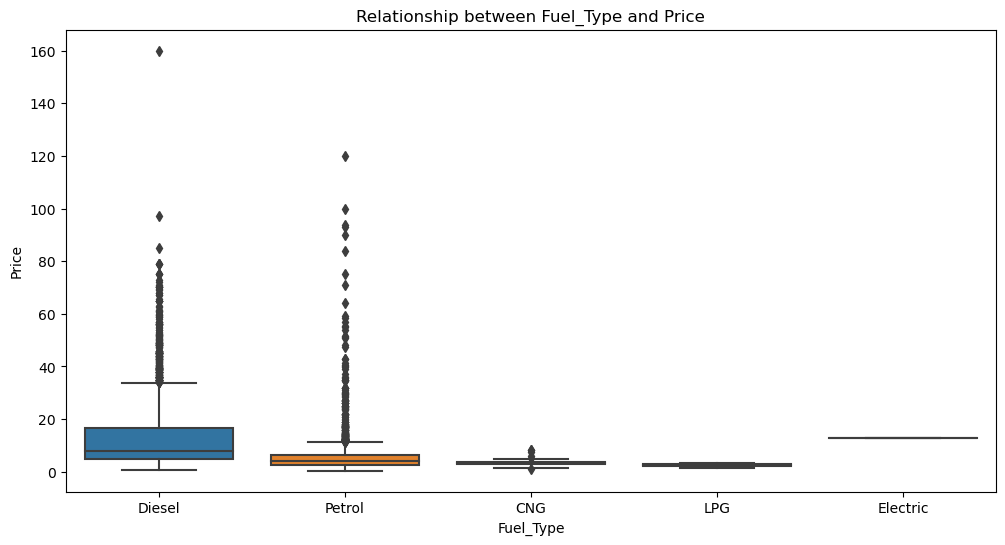

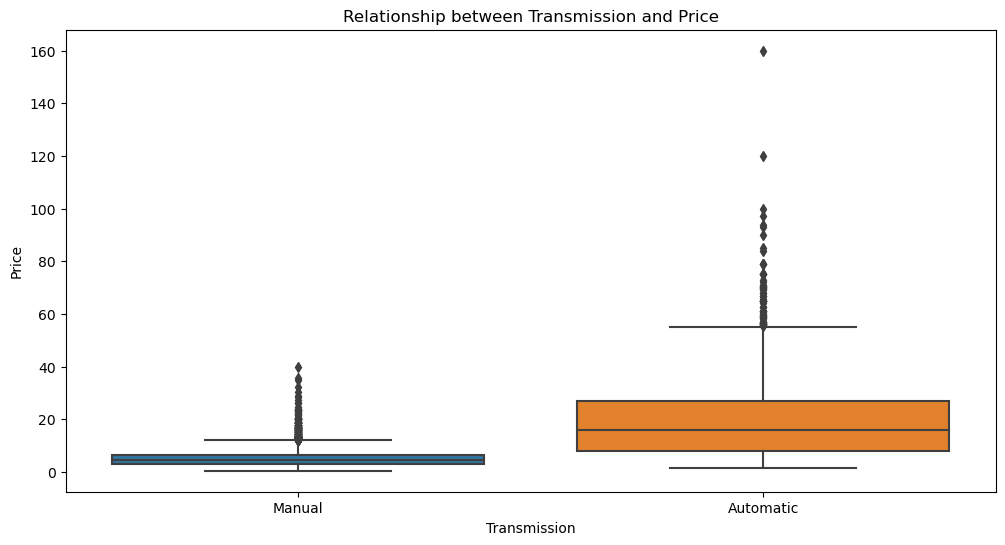

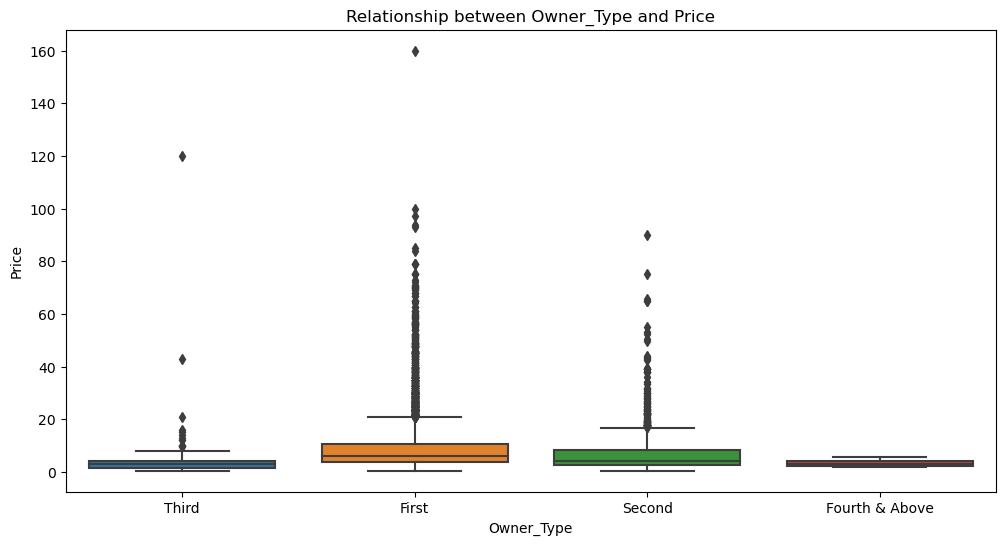

In [29]:
# Visualize relationships with categorical features
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']  # Add more if needed
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Price', data=df)
    plt.title(f'Relationship between {feature} and Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_10680\2033614211.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


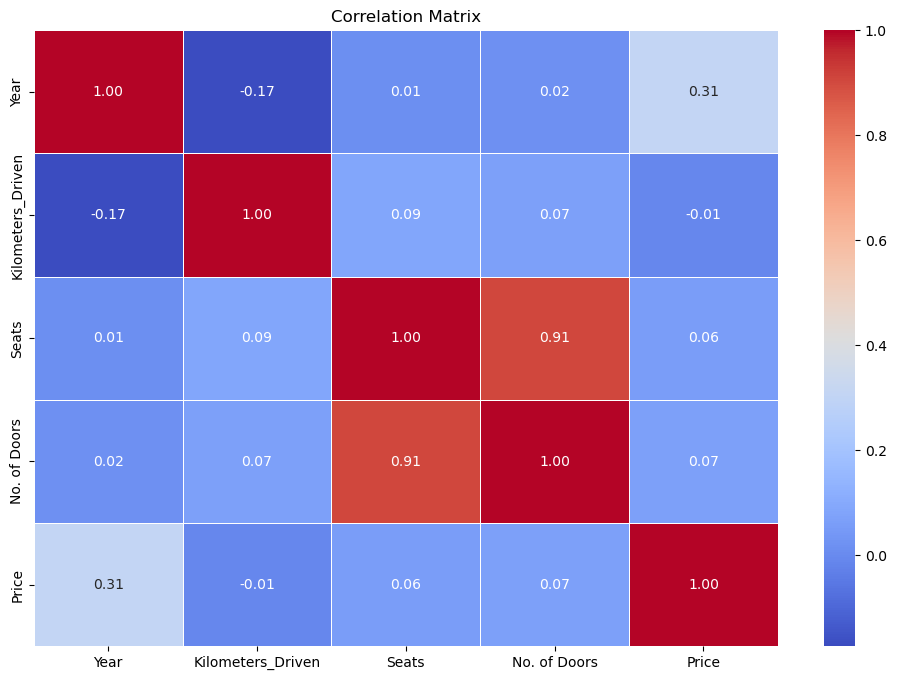

In [30]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


we can conclude that seats and number of doors ,price and year are coorelated with each other

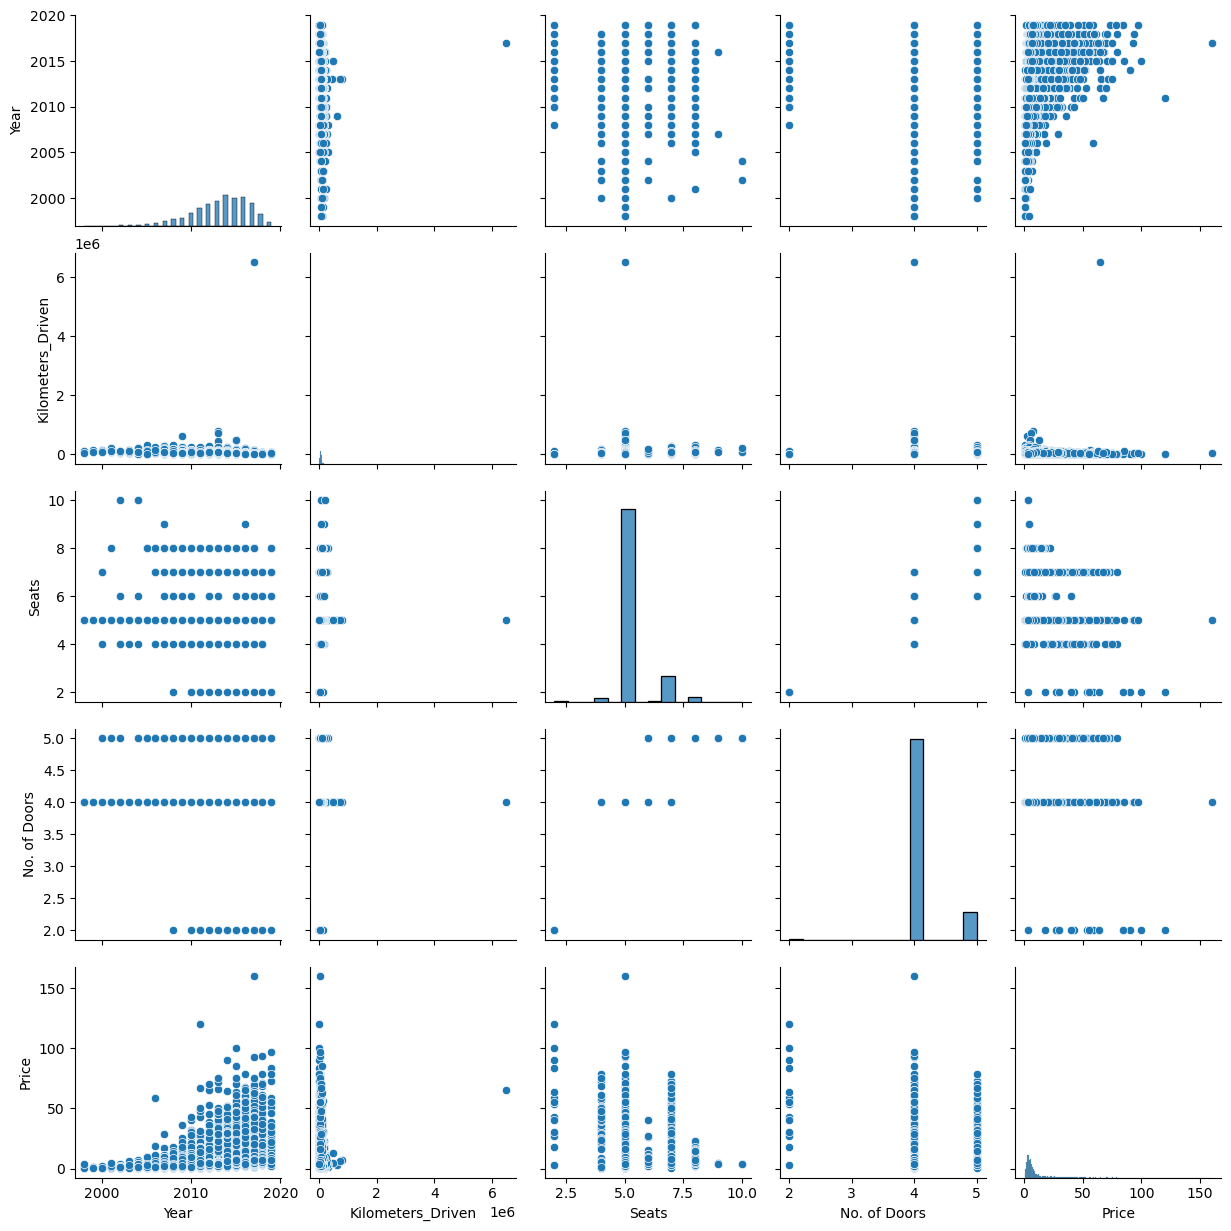

In [31]:
sns.pairplot(df)

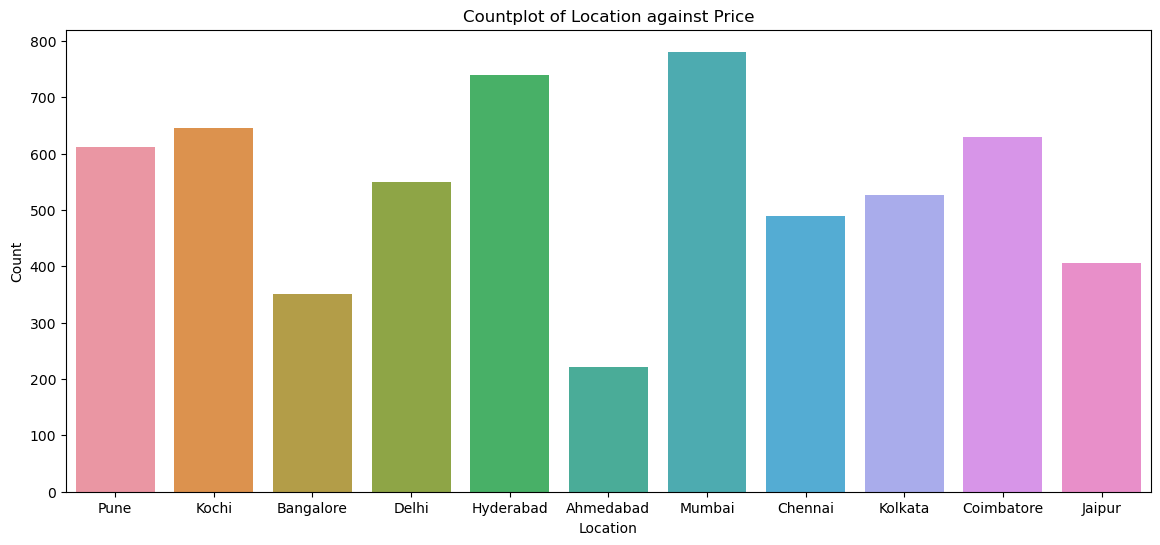

In [32]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Location', data=df)
plt.title('Countplot of Location against Price')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

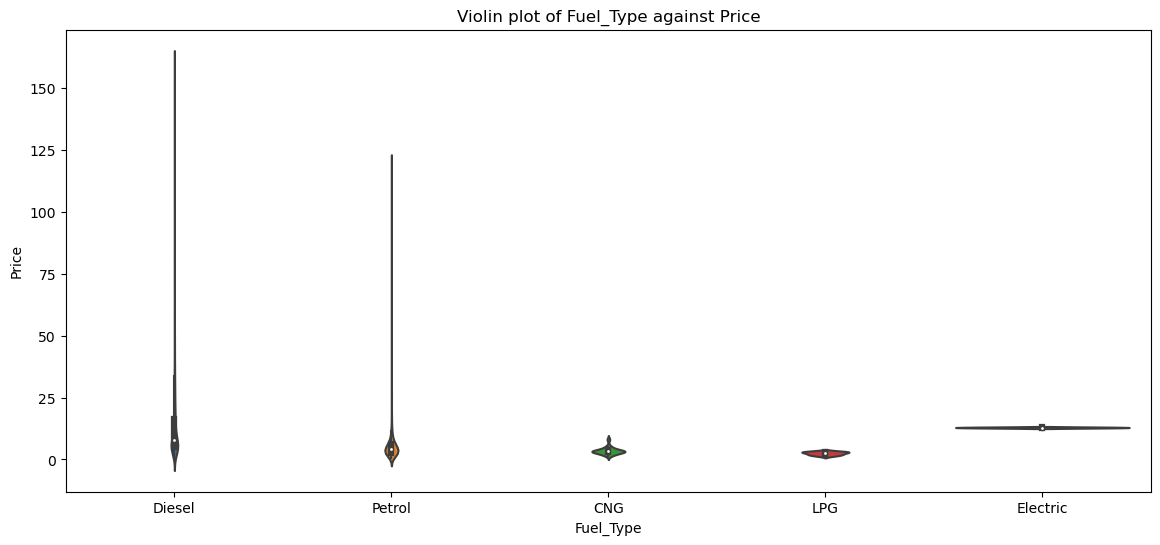

In [33]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='Fuel_Type', y='Price', data=df)
plt.title('Violin plot of Fuel_Type against Price')
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.show()

### Feature Engineering!

In [34]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40


In [35]:
# DETECTING OUTLIER IN NUMERICAL DATASET USING IQR

numeric_features = ['Mileage', 'Kilometers_Driven', 'Seats','No. of Doors','Engine','Power']  # Add more if needed

# Calculate the IQR for numeric features
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for IQR 
threshold = 1.5

# Identify outliers based on the threshold
outliers = ((df[numeric_features] < (Q1 - threshold * IQR)) | (df[numeric_features] > (Q3 + threshold * IQR))).any(axis=1)

# Display the rows containing outliers
outlier_rows = df[outliers]
print("Rows containing outliers:")
print(outlier_rows)


Rows containing outliers:
                         Name    Location    Year  Kilometers_Driven  \
0            Mahindra Scorpio        Pune  2012.0            99000.0   
2               Mahindra Xylo   Bangalore  2013.0           197000.0   
4               Toyota Innova       Delhi  2011.0            65000.0   
7             Toyota Fortuner        Pune  2015.0            36000.0   
8               Toyota Innova   Hyderabad  2009.0           156056.0   
...                       ...         ...     ...                ...   
5932            Honda Mobilio     Kolkata  2015.0            26000.0   
5934             Mahindra TUV   Hyderabad  2017.0            30000.0   
5939                  Audi Q7       Kochi  2014.0            79926.0   
5952         Mahindra Scorpio      Jaipur  2011.0            83000.0   
5959  Mercedes-Benz SLK-Class  Coimbatore  2016.0            22732.0   

     Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  \
0       Diesel       Manual      Th

C:\Users\dell\AppData\Local\Temp\ipykernel_10680\4231505641.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df[numeric_features].quantile(0.25)
C:\Users\dell\AppData\Local\Temp\ipykernel_10680\4231505641.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df[numeric_features].quantile(0.75)
C:\Users\dell\AppData\Local\Temp\ipykernel_10680\4231505641.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df[numeric_features] < (Q1 - threshold * 

 Removing outliers may impact the distribution of the data and, consequently, the number of missing values SO no outlier will be removed..

In [36]:
# finding mssiong values 
numeric_features = ['Mileage', 'Kilometers_Driven', 'Seats', 'No. of Doors', 'Engine', 'Power']

# Check for missing values in the specified numerical columns
missing_values = df[numeric_features].isnull().sum()

# Display the number of missing values for each column
print("Missing values in numerical columns:")
print(missing_values)



Missing values in numerical columns:
Mileage               2
Kilometers_Driven     8
Seats                 5
No. of Doors          1
Engine               17
Power                32
dtype: int64


In [37]:
# checking the data is skewed or not
numeric_columns = df.select_dtypes(include='number').columns

# Calculate skewness for each numeric column
skewness = df[numeric_columns].apply(lambda x: x.skew())

# Display skewness values
print("Skewness in numeric columns:")
print(skewness)


Skewness in numeric columns:
Year                 -0.835982
Kilometers_Driven    58.519236
Seats                 1.852410
No. of Doors          1.350845
Price                 3.328617
dtype: float64


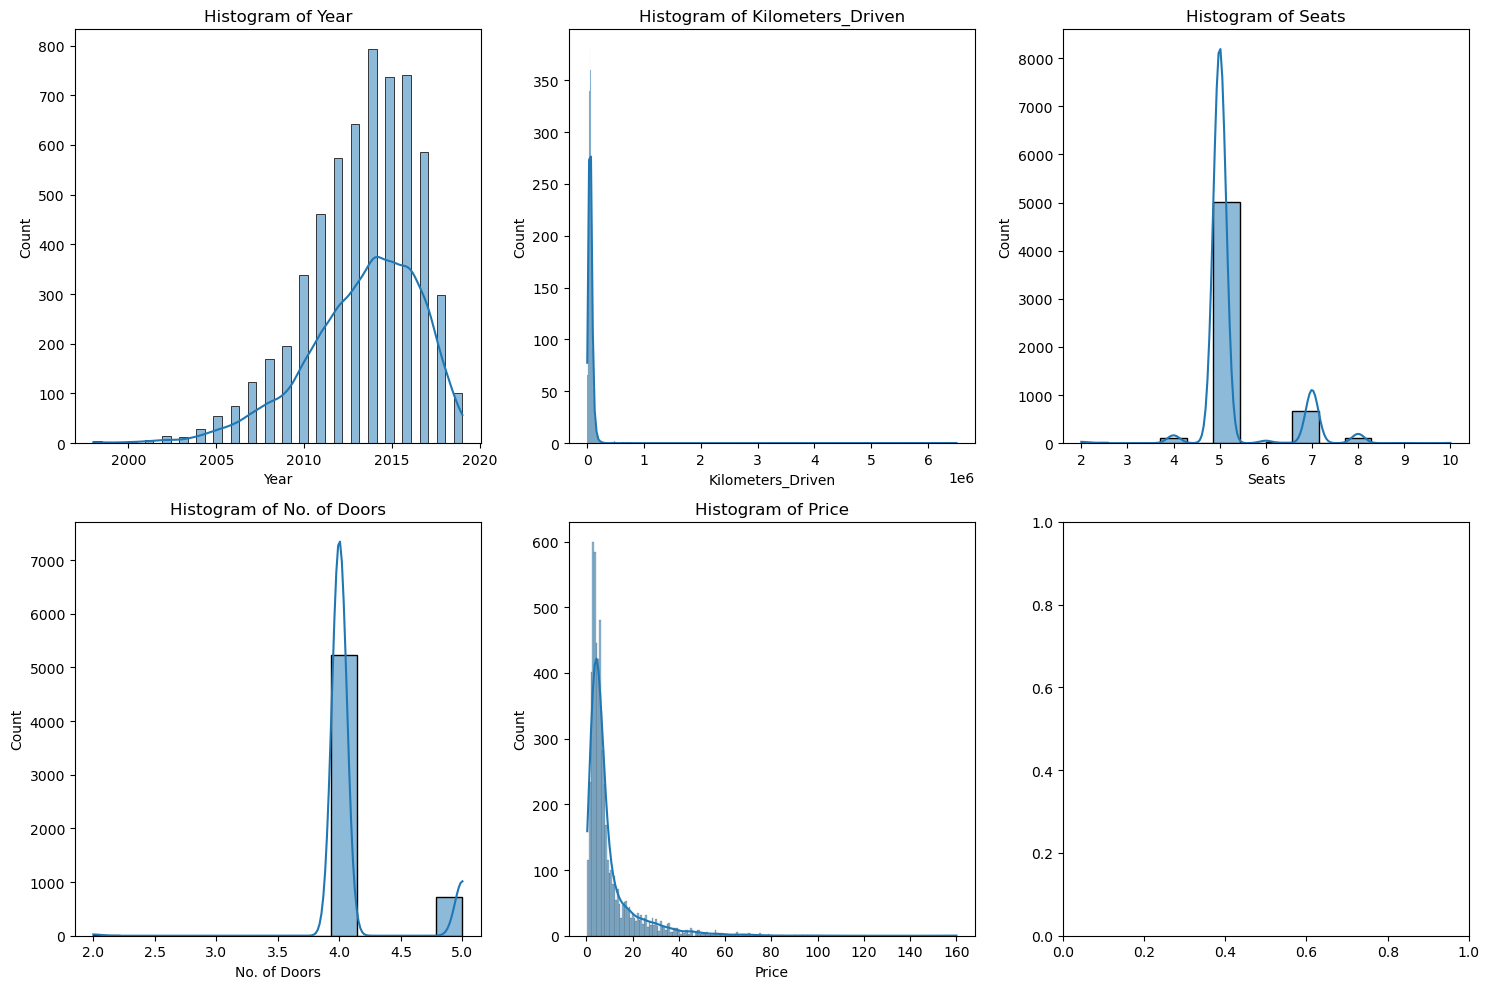

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Set the number of subplots
num_subplots = len(numeric_columns)
num_cols = 3  # Number of columns in each row
num_rows = (num_subplots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Calculate and plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [39]:

# Display unique values in 'Mileage', 'Engine', and 'Power' columns
print("Unique values in 'Mileage' column:")
print(df['Mileage'].unique())

print("\nUnique values in 'Engine' column:")
print(df['Engine'].unique())

print("\nUnique values in 'Power' column:")
print(df['Power'].unique())


Unique values in 'Mileage' column:
['12.05 kmpl' '21.1 kmpl' '11.68 kmpl' '24.0 kmpl' '12.8 kmpl' '17.5 kmpl'
 '24.8 kmpl' '12.55 kmpl' '25.44 kmpl' '10.4 kmpl' '18.6 kmpl' '17.0 kmpl'
 '17.4 kmpl' '27.39 kmpl' '12.07 kmpl' '19.01 kmpl' '20.77 kmpl'
 '0.0 kmpl' '15.0 kmpl' '18.2 kmpl' '21.76 kmpl' '18.5 kmpl' '18.9 kmpl'
 '16.0 kmpl' '24.3 kmpl' '12.4 kmpl' '21.5 kmpl' '20.36 kmpl' '25.8 kmpl'
 '22.5 kmpl' '24.4 kmpl' '12.5 kmpl' '13.2 kmpl' '22.07 kmpl' '19.64 kmpl'
 '18.48 kmpl' '16.55 kmpl' '16.07 kmpl' '20.92 kmpl' '20.38 kmpl'
 '13.49 kmpl' '13.68 kmpl' '15.06 kmpl' '15.3 kmpl' '20.54 kmpl'
 '22.69 kmpl' '13.24 kmpl' '19.7 kmpl' '13.06 kmpl' '16.96 kmpl'
 '24.07 kmpl' '18.7 kmpl' '20.73 kmpl' '16.77 kmpl' '11.1 kmpl'
 '15.1 kmpl' '14.84 kmpl' '18.88 kmpl' '13.5 kmpl' '17.05 kmpl'
 '17.1 kmpl' '27.3 kmpl' '16.8 kmpl' '13.7 kmpl' '10.5 kmpl' '14.28 kmpl'
 '19.5 kmpl' '15.6 kmpl' '25.83 kmpl' '22.0 kmpl' '24.52 kmpl'
 '11.07 kmpl' '16.51 kmpl' '19.33 kmpl' '25.2 kmpl' '17.9 kmpl'
 '1

In [42]:
# Extract numeric part and convert 'Mileage' to numeric
df['Mileage'] = pd.to_numeric(df['Mileage'].str.extract('(\d+\.\d+)').squeeze(), errors='coerce')

# Extract numeric part and convert 'Engine' to numeric
df['Engine'] = pd.to_numeric(df['Engine'].str.extract('(\d+)').squeeze(), errors='coerce')

# Extract numeric part and convert 'Power' to numeric
df['Power'] = pd.to_numeric(df['Power'].str.extract('(\d+\.\d+)').squeeze(), errors='coerce')

# Impute missing values with the mean for numeric columns
df[numeric_features] = df[numeric_features].apply(lambda x: x.fillna(x.mean()))

# Check if there are any remaining missing values
remaining_missing_values = df[numeric_features].isnull().sum()
print("Remaining missing values after imputation:")
print(remaining_missing_values)


Remaining missing values after imputation:
Mileage              0
Kilometers_Driven    0
Seats                0
No. of Doors         0
Engine               0
Power                0
dtype: int64


null value of numerical category is removed

In [45]:
df.isnull().sum()


Name                  0
Location             11
Year                  2
Kilometers_Driven     0
Fuel_Type             0
Transmission         27
Owner_Type           15
Mileage               0
Engine                0
Power                 0
Colour               11
Seats                 0
No. of Doors          0
Price                 0
dtype: int64

In [48]:
# REMOVING CATEGORICAL MISSINFG VALUES
categorical_features = ['Colour', 'Owner_Type', 'Transmission', 'Location', 'Year']

# Impute missing values with the most frequent category for each column
df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.value_counts().idxmax()))

# Check if there are any remaining missing values
remaining_missing_values_categorical = df[categorical_features].isnull().sum()
print("Remaining missing values in categorical features after imputation:")
print(remaining_missing_values_categorical)


Remaining missing values in categorical features after imputation:
Colour          0
Owner_Type      0
Transmission    0
Location        0
Year            0
dtype: int64


In [49]:
# COMPLETELY REMOVED ALL THE MISSING VALUES IN DATASET
df.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
dtype: int64

### NOW CONVERTING CATEGORICAL DATA INTO NUMERCIAL DATA WITH THE HELP OF ONE HOT ENCODING

In [50]:
# Assuming 'df' is your DataFrame
categorical_columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Colour']

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


               Name    Year  Kilometers_Driven  Mileage  Engine       Power  \
0  Mahindra Scorpio  2012.0            99000.0    12.05  2179.0  106.746213   
1     Maruti Baleno  2018.0            18678.0    21.10   998.0  106.746213   
2     Mahindra Xylo  2013.0           197000.0    11.68  2498.0  106.746213   
3     Hyundai Grand  2014.0            45000.0    24.00  1120.0  106.746213   
4     Toyota Innova  2011.0            65000.0    12.80  2494.0  106.746213   

   Seats  No. of Doors  Price  Location_Ahmedabad  ...  Fuel_Type_Petrol  \
0    8.0           5.0   6.00                   0  ...                 0   
1    5.0           4.0   8.32                   0  ...                 1   
2    7.0           5.0   4.00                   0  ...                 0   
3    5.0           4.0   3.49                   0  ...                 0   
4    8.0           5.0   6.40                   0  ...                 0   

   Transmission_Automatic  Transmission_Manual  Owner_Type_First  \


df_encoded is the new dataset

In [58]:
import pandas as pd

# Assuming 'df' is your DataFrame
categorical_columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Colour','Name']

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Check column names
print("Column names after one-hot encoding:")
print(df_encoded.columns)

# Display the first few rows of the encoded DataFrame
print("\nFirst few rows of the encoded DataFrame:")
print(df_encoded.head())

# Check data types
print("\nData types of the columns in the encoded DataFrame:")
print(df_encoded.dtypes)



Column names after one-hot encoding:
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'No. of Doors', 'Price', 'Location_Ahmedabad', 'Location_Bangalore',
       ...
       'Name_Volkswagen Jetta', 'Name_Volkswagen Passat',
       'Name_Volkswagen Polo', 'Name_Volkswagen Tiguan',
       'Name_Volkswagen Vento', 'Name_Volvo S60', 'Name_Volvo S80',
       'Name_Volvo V40', 'Name_Volvo XC60', 'Name_Volvo XC90'],
      dtype='object', length=245)

First few rows of the encoded DataFrame:
     Year  Kilometers_Driven  Mileage  Engine       Power  Seats  \
0  2012.0            99000.0    12.05  2179.0  106.746213    8.0   
1  2018.0            18678.0    21.10   998.0  106.746213    5.0   
2  2013.0           197000.0    11.68  2498.0  106.746213    7.0   
3  2014.0            45000.0    24.00  1120.0  106.746213    5.0   
4  2011.0            65000.0    12.80  2494.0  106.746213    8.0   

   No. of Doors  Price  Location_Ahmedabad  Location_Bangalore  ...  

In [59]:
df_encoded.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,Price,Location_Ahmedabad,Location_Bangalore,...,Name_Volkswagen Jetta,Name_Volkswagen Passat,Name_Volkswagen Polo,Name_Volkswagen Tiguan,Name_Volkswagen Vento,Name_Volvo S60,Name_Volvo S80,Name_Volvo V40,Name_Volvo XC60,Name_Volvo XC90
0,2012.0,99000.0,12.05,2179.0,106.746213,8.0,5.0,6.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018.0,18678.0,21.10,998.0,106.746213,5.0,4.0,8.32,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013.0,197000.0,11.68,2498.0,106.746213,7.0,5.0,4.00,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2014.0,45000.0,24.00,1120.0,106.746213,5.0,4.0,3.49,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011.0,65000.0,12.80,2494.0,106.746213,8.0,5.0,6.40,0,0,...,0,0,0,0,0,0,0,0,0,0


df_encoded is the new dataframe that will be passed in ml model

### Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

# Assuming 'df_encoded' contains all your features (X) and 'Price' is your target variable (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are your training features and target, and X_test and y_test are your testing features and target.


### CHECKING VARIOUS MODEL PERFORMANCE

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Assuming X and y are your feature matrix and target variable

# Linear Regression
linear_regression = LinearRegression()
linear_scores = cross_val_score(linear_regression, X, y, scoring='neg_mean_absolute_error', cv=5)

# Random Forest
random_forest = RandomForestRegressor()
rf_scores = cross_val_score(random_forest, X, y, scoring='neg_mean_absolute_error', cv=5)

# Support Vector Machine
svm = SVR()
svm_scores = cross_val_score(svm, X, y, scoring='neg_mean_absolute_error', cv=5)

# Display the mean absolute error for each model
print(f'Linear Regression MAE: {linear_scores.mean()}')
print(f'Random Forest MAE: {rf_scores.mean()}')
print(f'SVM MAE: {svm_scores.mean()}')



Linear Regression MAE: -12732.663008209956
Random Forest MAE: -1.5463292267905464
SVM MAE: -5.8955303566178205


When interpreting MAE, smaller values indicate better performance. Therefore, in this case, Random Forest seems to have the lowest MAE and is performing better than Linear Regression and SVM. 

random forest alone is not able to predict the correct value so hyperparameter tuning is applied..

### Hyperparameter Tuning

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model
rf_model = RandomForestRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Absolute Error: 1.4781013218643142


### PREDICTIVE SYSTEM

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Use the best hyperparameters obtained from tuning
best_hyperparameters = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

# Create the final Random Forest model with the best hyperparameters
final_model = RandomForestRegressor(**best_hyperparameters)

# Train the final model on the entire training dataset
final_model.fit(X_train, y_train)

# Make predictions on the test set
final_predictions = final_model.predict(X_test)

# Evaluate performance on the test set
final_mae = mean_absolute_error(y_test, final_predictions)
print(f'Final Mean Absolute Error: {final_mae}')

# Now, you can use `final_model` to make predictions on new, unseen data
#new_data_predictions = final_model.predict(new_data)
#print(new_data_predictions)


### Model Evaluation

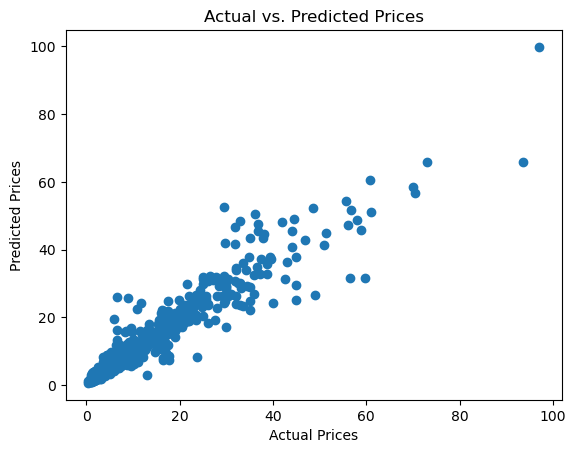

In [74]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, final_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


THE LINEAR LINE INDICATES THAT THE MODEL IS PREDICTING VALUES TO CLOSE TO ACTUAL PRICES

Insights/Suggestions (10 marks)
    Model Performance:
        The final Mean Absolute Error (MAE) of 1.5 indicates that, on average, your model's predictions are off by approximately $1,500.
        This level of accuracy may be acceptable depending on the context and industry standards.

    Feature Importance:
        Examine feature importance from the trained Random Forest model. Identify which features contribute the most to the predictions.
        This information can be valuable for understanding the key factors influencing car prices in your dataset.

    Visualization of Predictions:
        Visualize the scatter plot of actual vs. predicted prices. This will provide a clear picture of how well your model is capturing the underlying patterns.

    Domain-Specific Insights:
        If you have domain knowledge about the car industry, analyze if the model's predictions align with your expectations.
        Consider consulting with experts in the field to validate the model's predictions against real-world scenarios.

    Cross-Validation:
        If not done during training, consider using cross-validation to obtain a more robust estimate of the model's performance.

    Baseline Comparison:
        Compare the performance of your model with a simple baseline (e.g., predicting the mean price). A substantial improvement over the baseline suggests the model is adding value.

    Hyperparameter Tuning:
        Highlight the importance of hyperparameter tuning in achieving optimal model performance.
        Mention the tuned hyperparameters and how they contribute to the model's accuracy.

    Model Deployment:
        Discuss plans for deploying the model in a real-world scenario. Consider the infrastructure, frequency of updates, and integration with existing systems.

    Data Quality:
        Reflect on the quality of the data used for training and testing. If there were any challenges or limitations, acknowledge them and discuss potential ways to address them in the future.

    Future Improvements:

    Propose potential avenues for improvement, such as collecting additional relevant features, exploring more sophisticated models, or leveraging external data sources.